<a href="https://colab.research.google.com/github/Daehyun-Bigbread/Kakao_Tech/blob/main/KakaoTech_Bootcamp_GenAI_Day_1_(Web_Crawling_%26_Scrapper).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 데이터 수집 예시 (스크래핑)

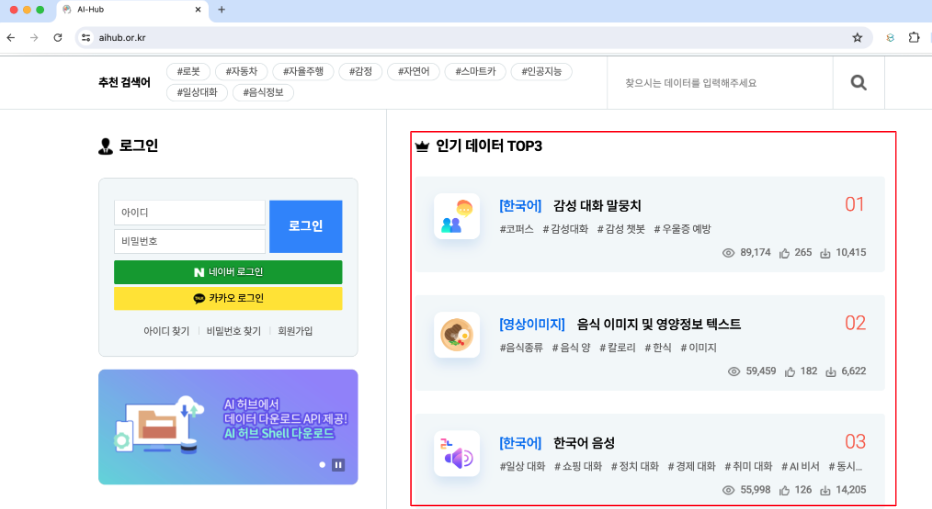

In [ ]:
import requests
from bs4 import BeautifulSoup

# AI Hub 페이지 URL
url = 'https://www.aihub.or.kr/'

# 웹 페이지 요청
response = requests.get(url)
response.raise_for_status()  # 요청이 성공했는지 확인

# BeautifulSoup 객체 생성
soup = BeautifulSoup(response.content, 'html.parser')

# 인기 데이터 TOP3 섹션 찾기
top3_section = soup.find('div', class_='secR')

# 각 데이터 항목 추출
data_list = top3_section.find_all('div', class_='list')

# 데이터 제목 추출
titles = []
for data in data_list:
    title = data.find('h3').get_text(strip=True)
    clean_title = title.split(']')[-1].strip()
    titles.append(clean_title)

# 추출한 데이터 출력
for idx, title in enumerate(titles, start=1):
    print(f"TOP {idx}: {title}")

TOP 1: 객체 간 관계성 인지용 한국형 비전 데이터
TOP 2: 손∙팔 협조에 의한 파지-조작 동작 데이터
TOP 3: 상용 자율주행차 야간 자동차 전용도로 데이터


2. requests 라이브러리 및 BeautifulSoup 사용 예제

In [ ]:
import requests
from bs4 import BeautifulSoup

# 1. 웹 페이지 요청
url = 'https://ko.wikipedia.org/wiki/위키백과:대문'
response = requests.get(url)

# 2. 요청이 성공했는지 확인
if response.status_code == 200:
    # 3. BeautifulSoup 객체 생성
    soup = BeautifulSoup(response.content, 'html.parser')

    # 4. 페이지 제목 추출
    title = soup.find('h1', id='firstHeading').text
    print(f"Title: {title}")

    # 5. 첫 번째 단락 추출
    first_paragraph = soup.find('p').text
    print(f"First paragraph: {first_paragraph}")
else:
    print(f"Failed to retrieve the web page. Status code: {response.status_code}")

Title: 위키백과:대문
First paragraph:  위키백과



3. Selenium 라이브러리 사용예제

In [ ]:
!pip install selenium

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By

# URL 설정
URL = "https://ko.wikipedia.org/wiki/위키백과:대문"

# Chrome 옵션 설정
options = webdriver.ChromeOptions()
options.add_argument("--headless") # 브라우저 창을 띄우지 않음
options.add_argument('--disable-dev-shm-usage')
options.add_argument("--no-sandbox")

# 웹 드라이버 설정
driver = webdriver.Chrome(options=options)

try:
    # 위키백과 대문 페이지 열기
    driver.get(URL)

    # "우리 모두가 만들어가는 자유 백과사전"과 "문서 이하 내용" 추출
    main_content = driver.find_element(By.CSS_SELECTOR, "#mw-content-text > div.mw-content-ltr.mw-parser-output > div.main-box.main-top > div > p:nth-child(2)").text
    print("Main Content:", main_content)
finally:
    # 웹 드라이버 종료
    driver.quit()

Main Content: 우리 모두가 만들어가는 자유 백과사전
문서 674,592개와 최근 기여자 1,814명


4. Scrapy 라이브러리 사용 예제

In [ ]:
# @title
!pip install scrapy

In [ ]:
# @title
!scrapy startproject wikipedia_scraper

Error: scrapy.cfg already exists in /content/wikipedia_scraper


In [ ]:
# @title
# wikipedia_scraper/spiders/wikipedia_spider.py
import scrapy

class WikipediaSpider(scrapy.Spider):
    name = "wikipedia"
    start_urls = [
        'https://ko.wikipedia.org/wiki/위키백과:대문',
    ]

    def parse(self, response):
        main_content = response.css('#mw-content-text > div.mw-content-ltr.mw-parser-output > div.main-pane > div.main-pane-right > div.wikipedia-ko.main-recommended.main-box').get()
        yield {
            'main_content': main_content,
        }


In [ ]:
# @title
%%writefile -a wikipedia_scraper/wikipedia_scraper/settings.py
ROBOTSTXT_OBEY = False

Appending to wikipedia_scraper/wikipedia_scraper/settings.py


In [ ]:
import sys
import os

# 현재 작업 디렉토리를 가져옵니다.
current_dir = os.getcwd()

# 프로젝트 디렉토리 설정 (wikipedia_scraper 폴더의 상위 폴더)
project_dir = os.path.join(current_dir, 'wikipedia_scraper')

# 프로젝트 디렉토리를 PYTHONPATH에 추가합니다.
sys.path.append(project_dir)

In [ ]:
!pwd

/content


In [ ]:
from scrapy.crawler import CrawlerProcess
from wikipedia_scraper.spiders.wikipedia_spider import WikipediaSpider

process = CrawlerProcess({
    'USER_AGENT': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
    'FEEDS': {
        'output.json': {
            'format': 'jsonlines',
            'encoding': 'utf8',
            'store_empty': False,
            'fields': None,
            'indent': 4,
        },
    },
})

process.crawl(WikipediaSpider)
process.start()


INFO:scrapy.utils.log:Scrapy 2.11.2 started (bot: scrapybot)
2024-07-02 12:09:47 [scrapy.utils.log] INFO: Scrapy 2.11.2 started (bot: scrapybot)
INFO:scrapy.utils.log:Versions: lxml 4.9.4.0, libxml2 2.10.3, cssselect 1.2.0, parsel 1.9.1, w3lib 2.2.1, Twisted 24.3.0, Python 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0], pyOpenSSL 24.1.0 (OpenSSL 3.2.2 4 Jun 2024), cryptography 42.0.8, Platform Linux-6.1.85+-x86_64-with-glibc2.35
2024-07-02 12:09:47 [scrapy.utils.log] INFO: Versions: lxml 4.9.4.0, libxml2 2.10.3, cssselect 1.2.0, parsel 1.9.1, w3lib 2.2.1, Twisted 24.3.0, Python 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0], pyOpenSSL 24.1.0 (OpenSSL 3.2.2 4 Jun 2024), cryptography 42.0.8, Platform Linux-6.1.85+-x86_64-with-glibc2.35
INFO:scrapy.addons:Enabled addons:
[]
2024-07-02 12:09:47 [scrapy.addons] INFO: Enabled addons:
[]
/usr/local/lib/python3.10/dist-packages/scrapy/utils/request.py:254: ScrapyDeprecationWarning: '2.6' is a deprecated value for the 'REQUEST_FINGERPRI

In [ ]:
# @title
!python run_scrapy.py

python3: can't open file '/content/run_scrapy.py': [Errno 2] No such file or directory


In [16]:
# @title
# 출력물을 예쁘게 출력
import json
from pprint import pprint

data = []
with open('output.json', 'r') as f:
    for line in f:
        line = line.strip()  # 공백 제거
        if line:  # 빈 줄 건너뛰기
            try:
                data.append(json.loads(line))
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON: {e}")

pprint(data)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
             "Henry's father ascended the throne, England was beset by  , and "
             'Henry may have wanted to avoid a similar uncertainty over the '
             'succession. \n'
             " It soon became the one absorbing object of Henry's desires to "
             'secure an annulment.  Catherine was defiant when it was '
             'suggested that she quietly retire to a nunnery, saying: "God '
             "never called me to a nunnery. I am the King's true and "
             'legitimate wife."  He set his hopes upon an appeal to the  , '
             'acting independently of Cardinal  , whom he told nothing of his '
             "plans.  , the King's secretary, was sent to   to sue for an "
             'annulment, on the grounds that the dispensing   of   was '
             'obtained by false pretenses.\n'
             " As the pope was, at that time, the prisoner of Catherine's "
             'nephew   following the   in May 152